Часть 1. Корреляционные методы отбора признаков  
Примените различные методы предобработки (например, нормализацию, стандартизацию, логарифмирование) к данным перед вычислением корреляции и сравните полученные результаты.
Каждое задание должно включать в себя следующие шаги: загрузка и предварительная обработка данных, применение метода отбора признаков, и, при необходимости, обучение модели на выбранных признаках и оценка производительности модели.
Здесь можно найти больше датасетов для этих задач:  
•	[UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php),  
•	[Kaggle Datasets](https://www.kaggle.com/datasets),  
•	[Google's Dataset Search](https://datasetsearch.research.google.com/)   


Задание 1: Работа с корреляционной матрицей.  
Используйте набор данных "Iris" из sklearn.datasets. Вычислите корреляционную матрицу числовых признаков. Затем визуализируйте эту матрицу с помощью heatmap в библиотеке seaborn.

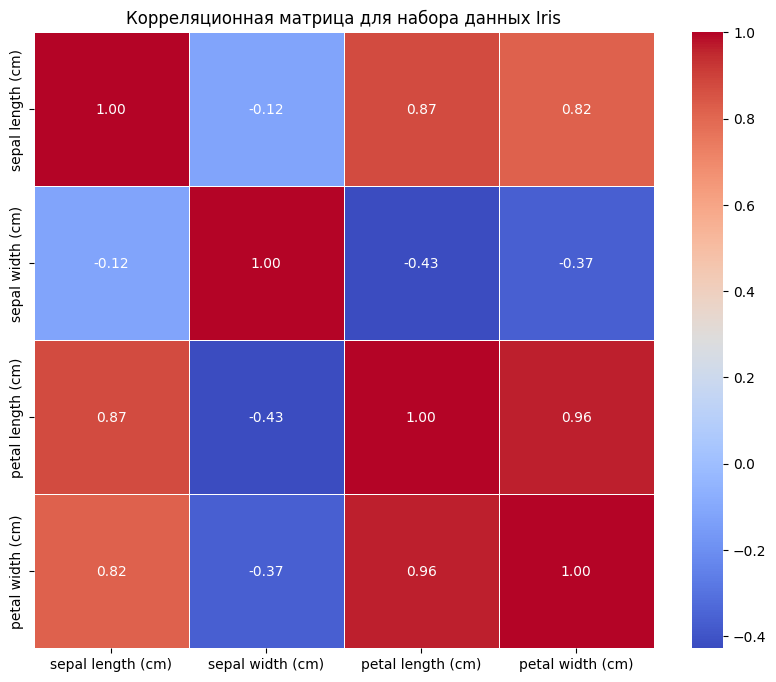

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Загрузка данных Iris
iris = load_iris()
X = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Корреляционная матрица показывает, насколько каждый признак связан с остальными признаками.
# Коэффициенты корреляции варьируются от -1 до 1, где значения, близкие к 1 или -1, указывают
# на сильную положительную или отрицательную корреляцию соответственно.

# Вычисление корреляционной матрицы
correlation_matrix = X.corr()

# Визуализация корреляционной матрицы с помощью heatmap
plt.figure(figsize=(10, 8))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Корреляционная матрица для набора данных Iris')
plt.show()

Задание 2: Исключение мультиколлинеарных признаков.  
Используйте набор данных "Wine" из sklearn.datasets. Вычислите корреляционную матрицу, а затем найдите и исключите признаки, у которых корреляция друг с другом превышает заданный порог.

In [4]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine

# Загрузка данных Wine
wine = load_wine()
X = pd.DataFrame(data=wine.data, columns=wine.feature_names)

# Вычисление корреляционной матрицы
correlation_matrix = X.corr()

# Поиск и исключение мультиколлинеарных признаков
threshold = 0.5  # Порог корреляции
columns_to_drop = set()

# Находим пары признаков с корреляцией выше заданного порога
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:  # Проверка по абсолютному значению
            colname = correlation_matrix.columns[i]  # Имя текущего столбца
            columns_to_drop.add(colname)  # Добавляем столбец в список на удаление

# Исключаем признаки с мультиколлинеарностью
X_reduced = X.drop(columns=columns_to_drop)

# Выводим результаты
print("Исключенные признаки:", columns_to_drop)
print("\nРазмерность исходного набора данных:", X.shape)
print("Размерность уменьшенного набора данных:", X_reduced.shape)

Исключенные признаки: {'od280/od315_of_diluted_wines', 'color_intensity', 'proline', 'nonflavanoid_phenols', 'proanthocyanins', 'flavanoids', 'hue'}

Размерность исходного набора данных: (178, 13)
Размерность уменьшенного набора данных: (178, 6)


Задание 3: Выбор наиболее значимых признаков.  
Используйте набор данных "Boston Housing" из sklearn.datasets. Вычислите коэффициенты корреляции между каждым признаком и целевой переменной, затем выберите n признаков с наибольшим абсолютным значением коэффициента.

In [5]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

# Загрузка набора California Housing
california_housing = fetch_california_housing()
X = pd.DataFrame(data=california_housing.data, columns=california_housing.feature_names)
y = pd.Series(data=california_housing.target, name='MedHouseVal')

# Вычисление коэффициентов корреляции
correlation = X.corrwith(y)

# Выбор n признаков с наибольшим абсолютным значением коэффициента корреляции
n = 5  # Количество признаков для выбора
top_features = correlation.abs().nlargest(n)

# Вывод результатов
print("Наиболее значимые признаки:")
print(top_features)

Наиболее значимые признаки:
MedInc       0.688075
AveRooms     0.151948
Latitude     0.144160
HouseAge     0.105623
AveBedrms    0.046701
dtype: float64


Задание 4: Применение Ранговой корреляции Спирмена.  
Используйте любой набор данных, имеющий порядковые признаки. Примените корреляцию Спирмена для выбора наиболее значимых признаков.

In [13]:
import pandas as pd
import seaborn as sns

# Загрузка набора Titanic
titanic = sns.load_dataset('titanic')

# Преобразование категориальных признаков в числовые
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2})

numeric_titanic = titanic[['pclass', 'sex', 'age', 'fare', 'survived', 'embarked']]

# Вычисление ранговой корреляции Спирмена
correlation_matrix = numeric_titanic.corr(method='spearman')

# Выбор наиболее значимых признаков
# Например, выберем признаки с коэффициентом корреляции > 0.3
threshold = 0.3
significant_features = correlation_matrix[correlation_matrix['survived'].abs() > threshold]['survived']

# Вывод результатов
print("Наиболее значимые признаки по корреляции Спирмена:")
print(significant_features)

Наиболее значимые признаки по корреляции Спирмена:
pclass     -0.339668
sex         0.543351
fare        0.323736
survived    1.000000
Name: survived, dtype: float64


Задание 5: Сравнение методов отбора признаков.  
Используйте один и тот же набор данных для применения различных методов отбора признаков, включая корреляционные методы, и сравните результаты.

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LassoCV

# Загрузка набора данных Wine
wine = load_wine()
X = pd.DataFrame(data=wine.data, columns=wine.feature_names)
y = pd.Series(data=wine.target, name='target')
y_one_hot = pd.get_dummies(y, prefix='species')

# Применение корреляционного метода
correlation_matrix = X.corr()
# Вычисляем корреляцию каждого признака с каждой категорией целевой переменной
correlation_with_target = X.corrwith(y_one_hot['species_0'])  # Для первого класса
correlation_with_target = correlation_with_target.abs()
correlated_features = correlation_with_target[correlation_with_target > 0.55].index.tolist()

# Применение метода Random Forest для отбора признаков
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
# Отбор 3 наиболее важных признаков
rf_selected_features = X.columns[indices][:3].tolist()

# Применение метода Lasso для отбора признаков
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X, y)
lasso_selected_features = X.columns[(lasso.coef_ != 0)].tolist()

# Сравнение результатов
print("Признаки, отобранные методом корреляции:")
print(correlated_features)

print("\nПризнаки, отобранные методом Random Forest:")
print(rf_selected_features)

print("\nПризнаки, отобранные методом Lasso:")
print(lasso_selected_features)

Признаки, отобранные методом корреляции:
['alcohol', 'total_phenols', 'flavanoids', 'proline']

Признаки, отобранные методом Random Forest:
['flavanoids', 'color_intensity', 'alcohol']

Признаки, отобранные методом Lasso:
['alcalinity_of_ash', 'flavanoids', 'color_intensity', 'proline']


Задание 6: Исследование влияния предобработки данных на результаты корреляционного анализа.  
Примените различные методы предобработки (например, нормализацию, стандартизацию, логарифмирование) к данным перед вычислением корреляции и сравните полученные результаты.

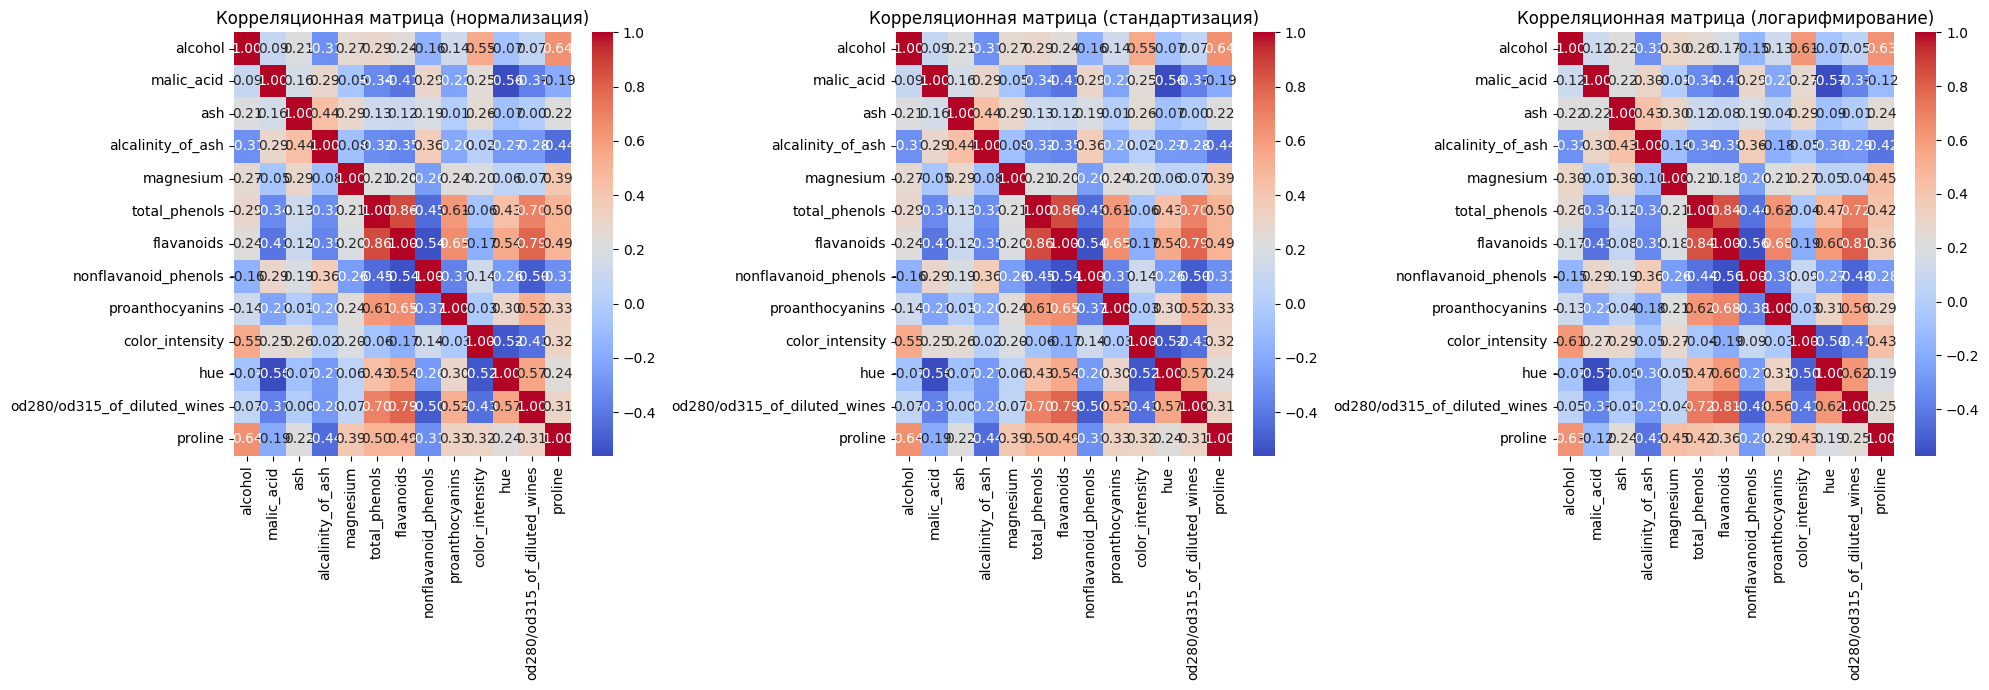

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np

# Загрузка набора данных Wine
wine = load_wine()
X = pd.DataFrame(data=wine.data, columns=wine.feature_names)

# Нормализация
scaler_minmax = MinMaxScaler()
X_normalized = scaler_minmax.fit_transform(X)

# Стандартизация
scaler_standard = StandardScaler()
X_standardized = scaler_standard.fit_transform(X)

# Логарифмирование (добавим 1, чтобы избежать логарифма нуля)
X_log_transformed = np.log1p(X)

# Вычисление корреляционной матрицы для каждой предобработки
correlation_normalized = pd.DataFrame(X_normalized, columns=X.columns).corr()
correlation_standardized = pd.DataFrame(X_standardized, columns=X.columns).corr()
correlation_log_transformed = pd.DataFrame(X_log_transformed, columns=X.columns).corr()

# Визуализация результатов
plt.figure(figsize=(20, 7))

# Корреляционная матрица для нормализованных данных
plt.subplot(1, 3, 1)
sns.heatmap(correlation_normalized, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Корреляционная матрица (нормализация)')

# Корреляционная матрица для стандартизованных данных
plt.subplot(1, 3, 2)
sns.heatmap(correlation_standardized, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Корреляционная матрица (стандартизация)')

# Корреляционная матрица для логарифмированных данных
plt.subplot(1, 3, 3)
sns.heatmap(correlation_log_transformed, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Корреляционная матрица (логарифмирование)')

plt.tight_layout()
plt.show()

Часть 2. Методы-обертки  
Каждое задание должно включать в себя следующие шаги: загрузка и предварительная обработка данных, применение метода отбора признаков, обучение модели на выбранных признаках и оценка производительности модели.
Если вы хотите найти больше данных для этих задач, вы можете выйти на такие источники:  
•	[UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php),  
•	[Kaggle Datasets](https://www.kaggle.com/datasets),  
•	[Google's Dataset Search](https://datasetsearch.research.google.com/) 

Задание 1: Рекурсивное исключение признаков (RFE).  
Используйте набор данных "Iris" из sklearn.datasets. Примените метод RFE с использованием модели логистической регрессии. Укажите количество признаков для выбора и сравните производительность модели с и без этих признаков.

In [27]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

# Загрузка набора Iris
iris = load_iris()
X = pd.DataFrame(data=iris.data, columns=iris.feature_names)
y = iris.target

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Применение метода RFE с логистической регрессией
# Указываем количество признаков для выбора
n_features_to_select = 2
model = LogisticRegression(max_iter=200)

# Создание объекта RFE
rfe = RFE(estimator=model, n_features_to_select=n_features_to_select)
rfe.fit(X_train, y_train)

# Получаем отобранные признаки
selected_features = X.columns[rfe.support_]
print("Отобранные признаки:", selected_features.tolist())

# Обучение модели на отобранных признаках
model.fit(X_train[selected_features], y_train)
y_pred_selected = model.predict(X_test[selected_features])
accuracy_selected = accuracy_score(y_test, y_pred_selected)

# Обучение модели на всех признаках
model.fit(X_train, y_train)
y_pred_all = model.predict(X_test)
accuracy_all = accuracy_score(y_test, y_pred_all)

# Сравнение производительности
print("Точность модели с отобранными признаками:", accuracy_selected)
print("Точность модели со всеми признаками:", accuracy_all)

Отобранные признаки: ['petal length (cm)', 'petal width (cm)']
Точность модели с отобранными признаками: 1.0
Точность модели со всеми признаками: 1.0


Задание 2: Sequential Feature Selector.  
Используйте набор данных "Boston Housing" из sklearn.datasets. Используйте Sequential Feature Selector для выбора признаков с использованием модели Random Forest.

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Загружаем набор данных California Housing
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = pd.Series(california.target)

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Применяем Random Forest и Sequential Feature Selector
rf = RandomForestRegressor(n_estimators=100, random_state=42)
sfs = SequentialFeatureSelector(rf, n_features_to_select=5, direction='forward', cv=5)
sfs.fit(X_train, y_train)

# Получаем выбранные признаки
selected_features = X.columns[sfs.get_support()]
print("Выбранные признаки с помощью SFS:", selected_features.tolist())

# Оцениваем модель на выбранных признаках
rf.fit(X_train[selected_features], y_train)
y_pred = rf.predict(X_test[selected_features])
mse = mean_squared_error(y_test, y_pred)
print("MSE модели с выбранными признаками:", mse)

Выбранные признаки с помощью SFS: ['MedInc', 'AveBedrms', 'Population', 'Latitude', 'Longitude']
MSE модели с выбранными признаками: 0.23753665124971582


Задание 3: Использование метода-обертки при кросс-валидации.  
Используйте любой набор данных на ваше усмотрение. Выберите модель машинного обучения и метод-обертку для отбора признаков. Примените кросс-валидацию, чтобы оценить эффективность этого подхода.

In [33]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

# Загрузка данных
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Инициализация модели логистической регрессии с увеличенным количеством итераций
model = LogisticRegression(max_iter=500)  # Увеличиваем max_iter

# Применение RFE для выбора признаков
rfe = RFE(model, n_features_to_select=5)  # Выбираем 5 признаков
rfe.fit(X_train_scaled, y_train)

# Получение выбранных признаков
selected_features = X.columns[rfe.support_].tolist()
print("Выбранные признаки:", selected_features)

# Оценка модели с выбранными признаками с помощью кросс-валидации
scores_with_selected = cross_val_score(model, X_train_scaled[:, rfe.support_], y_train, cv=5)
print("Точность с выбранными признаками:", np.mean(scores_with_selected))

# Оценка модели со всеми признаками с помощью кросс-валидации
scores_with_all = cross_val_score(model, X_train_scaled, y_train, cv=5)
print("Точность со всеми признаками:", np.mean(scores_with_all))


Выбранные признаки: ['alcohol', 'flavanoids', 'color_intensity', 'hue', 'proline']
Точность с выбранными признаками: 0.9716748768472907
Точность со всеми признаками: 0.9790640394088671


Задание 4: Сравнение методов-оберток.  
Используйте один и тот же набор данных для применения различных методов-оберток для отбора признаков, например, RFE и Sequential Feature Selector, и сравните полученные результаты.

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE, SequentialFeatureSelector
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Загружаем набор данных Iris
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Инициализируем логистическую регрессию для RFE
lr = LogisticRegression(max_iter=1000)

# Применяем RFE для выбора признаков
rfe = RFE(estimator=lr, n_features_to_select=2)
rfe.fit(X_train, y_train)

# Получаем выбранные признаки с помощью RFE
rfe_selected_features = X.columns[rfe.support_]
print("Выбранные признаки с помощью RFE:", rfe_selected_features.tolist())

# Оцениваем модель с выбранными признаками
lr.fit(X_train[rfe_selected_features], y_train)
y_pred_rfe = lr.predict(X_test[rfe_selected_features])
accuracy_rfe = accuracy_score(y_test, y_pred_rfe)
print("Точность модели с выбранными признаками (RFE):", accuracy_rfe)

# Инициализируем Random Forest для Sequential Feature Selector
rf = RandomForestClassifier()

# Применяем Sequential Feature Selector для выбора признаков
sfs = SequentialFeatureSelector(rf, n_features_to_select=2, direction='forward', cv=5)
sfs.fit(X_train, y_train)

# Получаем выбранные признаки с помощью SFS
sfs_selected_features = X.columns[sfs.get_support()]
print("Выбранные признаки с помощью SFS:", sfs_selected_features.tolist())

# Оцениваем модель с выбранными признаками
rf.fit(X_train[sfs_selected_features], y_train)
y_pred_sfs = rf.predict(X_test[sfs_selected_features])
accuracy_sfs = accuracy_score(y_test, y_pred_sfs)
print("Точность модели с выбранными признаками (SFS):", accuracy_sfs)

Выбранные признаки с помощью RFE: ['petal length (cm)', 'petal width (cm)']
Точность модели с выбранными признаками (RFE): 1.0
Выбранные признаки с помощью SFS: ['petal length (cm)', 'petal width (cm)']
Точность модели с выбранными признаками (SFS): 1.0


Задание 5: Анализ предсказательной способности признаков.  
Используйте набор данных "Wine" из sklearn.datasets. Выберите модель машинного обучения и метод-обертку для отбора признаков и исследуйте, как влияет отбор признаков на предсказательную способность модели.

In [39]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Загружаем набор Wine
data = load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабируем данные
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Инициализируем логистическую регрессию с увеличенным max_iter
lr = LogisticRegression(max_iter=2000)

# Применяем RFE для выбора признаков
n_features_to_select = 5  # Указываем количество признаков для выбора
rfe = RFE(estimator=lr, n_features_to_select=n_features_to_select)
rfe.fit(X_train_scaled, y_train)

# Получаем выбранные признаки
selected_features = X.columns[rfe.support_]
print("Выбранные признаки с помощью RFE:", selected_features.tolist())

# Оцениваем модель с выбранными признаками
lr.fit(X_train_scaled[:, rfe.support_], y_train)
y_pred_selected = lr.predict(X_test_scaled[:, rfe.support_])
accuracy_selected = accuracy_score(y_test, y_pred_selected)
print("Точность модели с выбранными признаками:", accuracy_selected)

# Оцениваем модель со всеми признаками
lr.fit(X_train_scaled, y_train)
y_pred_all = lr.predict(X_test_scaled)
accuracy_all = accuracy_score(y_test, y_pred_all)
print("Точность модели со всеми признаками:", accuracy_all)

Выбранные признаки с помощью RFE: ['alcohol', 'flavanoids', 'color_intensity', 'hue', 'proline']
Точность модели с выбранными признаками: 1.0
Точность модели со всеми признаками: 1.0
